In [76]:
from product_sub.infrastructure.dataset_builder import DatasetBuilder
from product_sub.domain.data_cleaning import NumImputer, CatImputer
from product_sub.domain.feature_selector import FeatureSelector
import product_sub.settings as stg

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline, make_union
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd





In [ ]:
dataset_merged = DatasetBuilder(
    filename_bank="data.csv", filename_socio="socio_eco.csv"
).merge()

dataset_merged = dataset_merged.drop(columns=stg.COL_RAW_DATE)
X = dataset_merged.drop(columns=stg.COL_RAW_SUBSCRIPTION)
y = dataset_merged[stg.COL_RAW_SUBSCRIPTION].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

num_pipe = Pipeline(steps=[
    ('feature_selector_num', FeatureSelector(np.number)),
    ('num_imputer', NumImputer()),
    ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=[
    ('feature_selector_cat', FeatureSelector(object)),
    ('cat_imputer', CatImputer([stg.COL_RAW_JOB, stg.COL_RAW_EDUCATION]) ),
    ('encoder', OneHotEncoder())
])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", num_pipe),
        ("categorical_pipeline", cat_pipe),
    ])

X_train = preprocess_pipeline.fit_transform(X_train)
X_train

In [71]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, plot_confusion_matrix


dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1)
}

In [72]:
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()


d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean]}

result_df = pd.DataFrame(data=d)

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [73]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.905561
1,SVC,0.905201
2,KNN,0.895369
3,Dec Tree,0.876066
4,Grad B CLF,0.909134
5,Rand FC,0.903955
6,Neural Classifier,0.906835


In [25]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

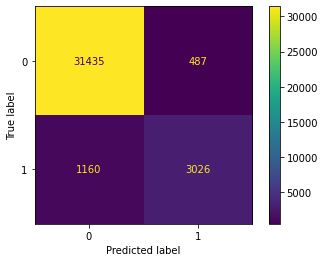

In [36]:
y_pred = xgb_model.predict(X_train)
plot_confusion_matrix(xgb_model,X_train, y_train)


In [43]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
xgb_model = xgb.XGBClassifier(objective="binary:logistic")
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2, 6), 
    "n_estimators": randint(100, 150), 
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=150, cv=3, verbose=1, n_jobs=1, return_train_score=True)
search.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  7.8min finished


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x12f037bb0>,
                                        'max_depth': <s

In [48]:
def print_scores_xgb(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

Model with rank: 1
Mean validation score: 0.911 (std: 0.003)
Parameters: {'colsample_bytree': 0.8345272428958741, 'gamma': 0.49722873130541034, 'learning_rate': 0.0827775758032036, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.7975574860733738}

In [49]:
print_scores_xgb(search.cv_results_, 3)


Model with rank: 1
Mean validation score: 0.911 (std: 0.003)
Parameters: {'colsample_bytree': 0.8345272428958741, 'gamma': 0.49722873130541034, 'learning_rate': 0.0827775758032036, 'max_depth': 5, 'n_estimators': 132, 'subsample': 0.7975574860733738}

Model with rank: 2
Mean validation score: 0.911 (std: 0.002)
Parameters: {'colsample_bytree': 0.8272666027740928, 'gamma': 0.453177192547368, 'learning_rate': 0.0633592446918454, 'max_depth': 4, 'n_estimators': 144, 'subsample': 0.6045414579069676}

Model with rank: 2
Mean validation score: 0.911 (std: 0.002)
Parameters: {'colsample_bytree': 0.930847879957581, 'gamma': 0.09352187427876169, 'learning_rate': 0.12710377092127312, 'max_depth': 4, 'n_estimators': 119, 'subsample': 0.803044151473782}



In [62]:
xgb_model = xgb.XGBClassifier(colsample_bytree= 0.930847879957581, gamma= 0.09352187427876169, learning_rate= 0.12710377092127312, 
max_depth= 4, n_estimators= 119, subsample= 0.803044151473782)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.930847879957581,
              gamma=0.09352187427876169, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.12710377092127312,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=119, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.803044151473782,
              tree_method='exact', validate_parameters=1, verbosity=None)

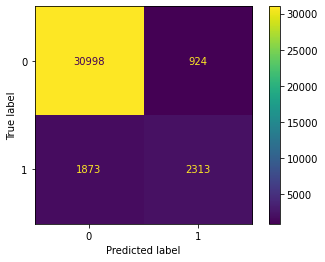

In [65]:
y_pred = xgb_model.predict(X_train)
plot_confusion_matrix(xgb_model,X_train, y_train)

In [74]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

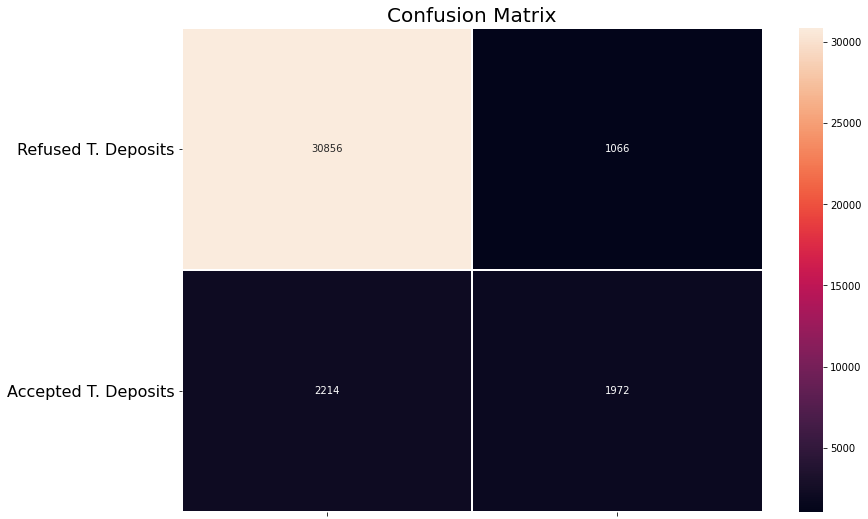

In [77]:
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [78]:
from sklearn.metrics import precision_score, recall_score
print('Precision Score: ', precision_score(y_train, y_train_pred))

print('Recall Score: ', recall_score(y_train, y_train_pred))

Precision Score:  0.6491112574061882
Recall Score:  0.4710941232680363


In [79]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

0.5459579180509413

In [82]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(log_reg, X_train, y_train, cv=3, method="predict_proba")

/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/emiliodesousa/Documents/Yotta_Academy/Projets/Machine_Learning/productsubscription_eds_dm/.venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepr

In [83]:
y_scores.shape

(36108,)

In [84]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

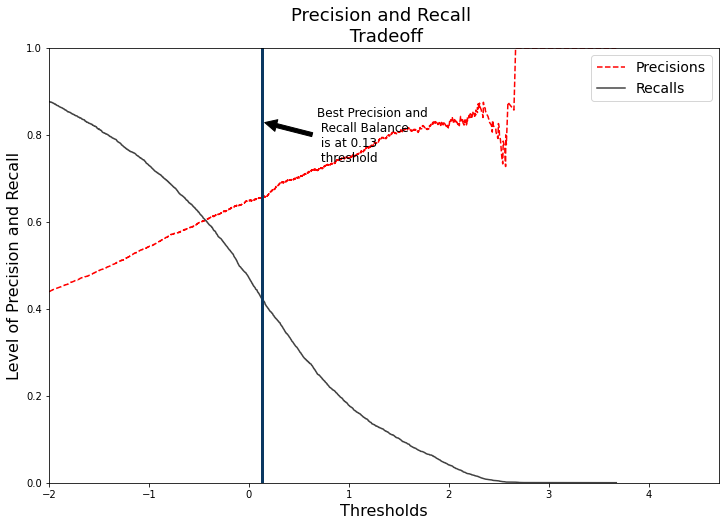

In [85]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()